In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Loading Data
df=pd.read_csv("data.csv",encoding = "ISO-8859-1",engine='python')
pd.set_option("display.max_columns",16)
pd.set_option("display.max_rows",80)
print(df.shape)
df.head()

(435742, 13)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


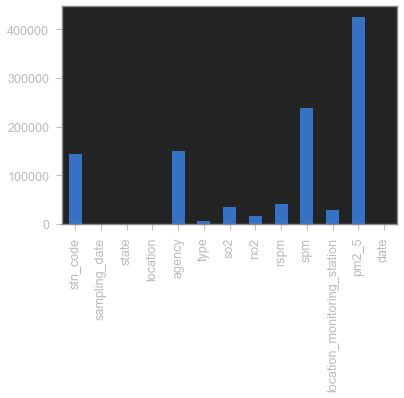

In [5]:
df.isnull().sum().plot(kind='bar') #pm2_5 has maximum null values

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
#Since pm2_5 contains almost missing value terefor we can drop it
df.drop("pm2_5",axis=1,inplace=True)
#Duplicate column
df.drop(["sampling_date",'location_monitoring_station','stn_code'],axis=1,inplace=True)
#drop
df=df.drop_duplicates()

In [8]:
#Covert to datetime
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")
df['year'] = df['date'].dt.year

In [9]:
df.describe()

,so2,no2,rspm,spm,year
count,400104.000000,418488.000000,394667.000000,198025.000000,434618.000000
mean,10.832976,25.826434,108.888211,220.818582,2009.540192
std,11.169894,18.498161,74.898207,151.370835,4.778755
min,0.000000,0.000000,0.000000,0.000000,1987.000000
25%,5.000000,14.000000,56.000000,111.000000,2007.000000
50%,8.000000,22.000000,90.000000,187.000000,2010.000000
75%,13.700000,32.200000,142.000000,296.000000,2013.000000
max,909.000000,876.000000,6307.033333,3380.000000,2015.000000


In [10]:
#the 75% values are around 13.7 terefore tey migt ave outliers
#handling NA values
fill_col=['so2','no2','rspm','spm']
for i in fill_col:
    df[i]=df[i].fillna(df[i].mean())

#andling categorical variables:
#Replaceing tem wit NA
df['agency'].fillna("NA",inplace=True)
df['type'].fillna("NA",inplace=True)
df=df.dropna()

In [11]:
df.isnull().sum()

state       0
location    0
agency      0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
year        0
dtype: int64

#### handling outliers

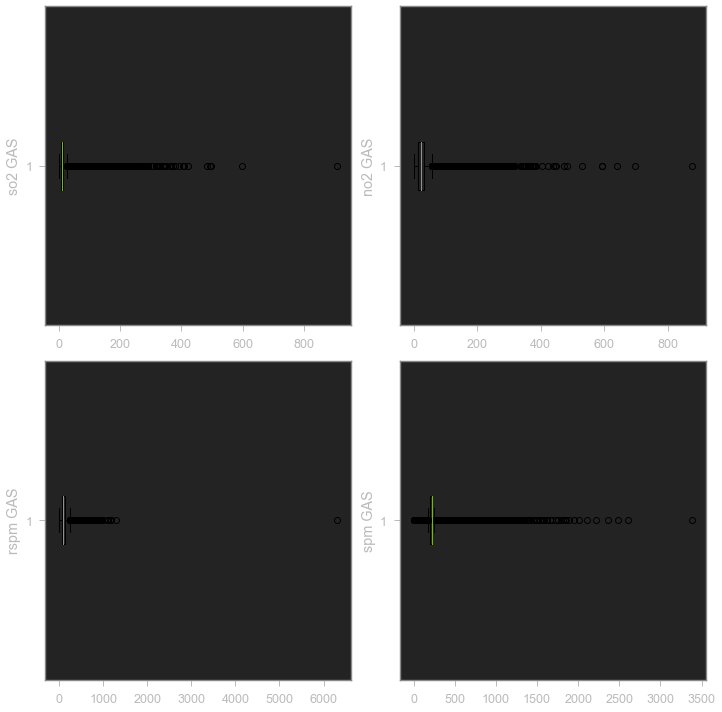

In [12]:
from matplotlib import gridspec
fig=plt.figure(figsize=(10,10))
gs=gridspec.GridSpec(2,2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])

#Boxplot so2
ax1.boxplot(df['so2'],vert=False)
ax1.set_ylabel("so2 GAS")
ax2.boxplot(df['no2'],vert=False)
ax2.set_ylabel("no2 GAS")
ax3.boxplot(df['rspm'],vert=False)
ax3.set_ylabel("rspm GAS")
ax4.boxplot(df['spm'],vert=False)
ax4.set_ylabel("spm GAS")
plt.tight_layout()

Clearly there are outliers. We are gonna use Quantiles to eliminate outliers

In [13]:
#so2 outliers
cols=['so2','no2','rspm','spm']
for col in cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    df=df[~((df[col]<(Q1-1.5*IQR))|(df[col]>(Q3+1.5*IQR)))]

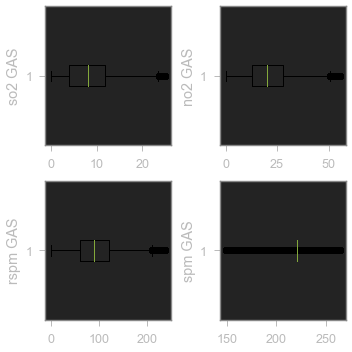

In [14]:
fig=plt.figure(figsize=(5,5))
gs=gridspec.GridSpec(2,2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])

#Boxplot so2
ax1.boxplot(df['so2'],vert=False)
ax1.set_ylabel("so2 GAS")
ax2.boxplot(df['no2'],vert=False)
ax2.set_ylabel("no2 GAS")
ax3.boxplot(df['rspm'],vert=False)
ax3.set_ylabel("rspm GAS")
ax4.boxplot(df['spm'],vert=False)
ax4.set_ylabel("spm GAS")
plt.tight_layout()

In [15]:
#Correlation matrix
#Correlation between so2 and no2 is observed
corr=df.corr()
corr

,so2,no2,rspm,spm,year
so2,1.000000,0.435653,0.240355,-0.065464,-0.178184
no2,0.435653,1.000000,0.352313,0.003851,-0.076362
rspm,0.240355,0.352313,1.000000,0.085271,-0.096494
spm,-0.065464,0.003851,0.085271,1.000000,0.319867
year,-0.178184,-0.076362,-0.096494,0.319867,1.000000


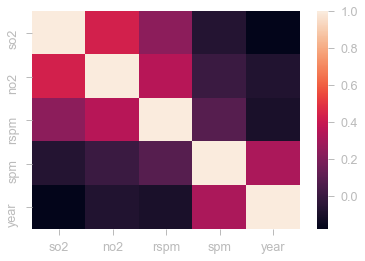

In [16]:
#heatmap
sns.heatmap(corr)

In [17]:
#Renameing same entries in "Type" column
sname={"Residential, Rural and other Areas":"Residential",
       "Residential and others":"Residential","Industrial":"Industrial Area",
      "Industrial Areas":"Industrial Area","Sensitive Areas":"Sensitive Area",
      "Sensitive" : "Sensitive Area"}
df['type'].replace(sname,inplace=True)

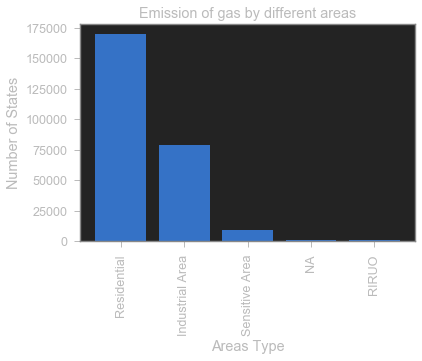

In [18]:
#plotting te type areas for pollution
#grouping tupe areas
areas=df.groupby('type')['state'].count()
areas=pd.DataFrame(areas)
areas=areas.sort_values(by=['state'],ascending=False)
plt.bar(areas.index,areas['state'])
plt.xlabel("Areas Type")
plt.xticks(rotation='vertical')
plt.ylabel("Number of States")
plt.title("Emission of gas by different areas")
plt.show()

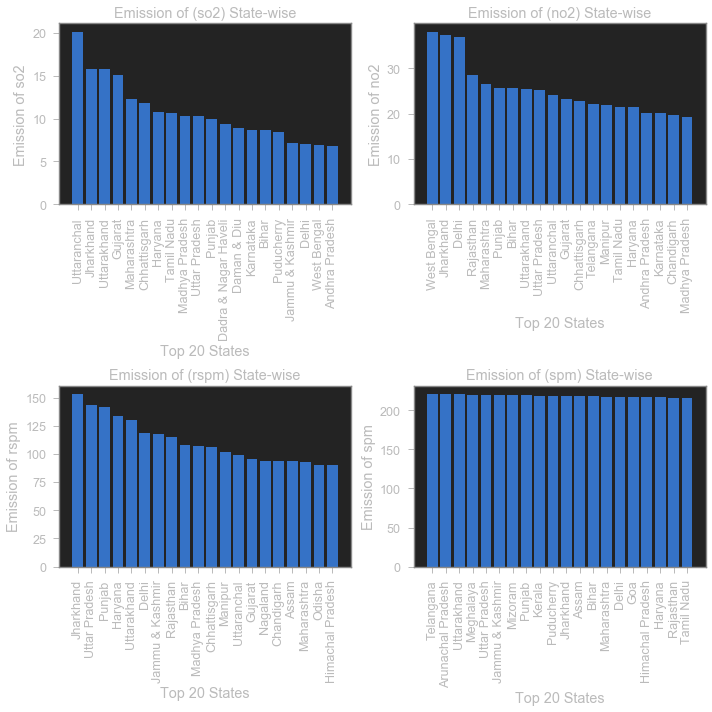

In [19]:
#emission of so2,no2,rspm,spm in different states
fig=plt.figure(figsize=(10,10))
gs=gridspec.GridSpec(2,2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])

#so2 emission by States
so2_em= pd.DataFrame(df.groupby('state')['so2'].mean()) #Since we ave removed outliers we can plot mean() 
so2_em=so2_em.sort_values(by='so2',ascending=False)
ax1.bar(so2_em.index[0:20],so2_em['so2'][0:20])
ax1.set_xticklabels(so2_em.index[0:20],rotation='vertical')
ax1.set_xlabel("Top 20 States")
ax1.set_ylabel("Emission of so2")
ax1.set_title("Emission of (so2) State-wise")
plt.tight_layout()

no2_em= pd.DataFrame(df.groupby('state')['no2'].mean()) #Since we ave removed outliers we can plot mean() 
no2_em=no2_em.sort_values(by='no2',ascending=False)
ax2.bar(no2_em.index[0:20],no2_em['no2'][0:20])
ax2.set_xticklabels(no2_em.index[0:20],rotation='vertical')
ax2.set_xlabel("Top 20 States")
ax2.set_ylabel("Emission of no2")
ax2.set_title("Emission of (no2) State-wise")
plt.tight_layout()

rspm_em= pd.DataFrame(df.groupby('state')['rspm'].mean()) #Since we ave removed outliers we can plot mean() 
rspm_em=rspm_em.sort_values(by='rspm',ascending=False)
ax3.bar(rspm_em.index[0:20],rspm_em['rspm'][0:20])
ax3.set_xticklabels(rspm_em.index[0:20],rotation='vertical')
ax3.set_xlabel("Top 20 States")
ax3.set_ylabel("Emission of rspm")
ax3.set_title("Emission of (rspm) State-wise")
plt.tight_layout()

spm_em= pd.DataFrame(df.groupby('state')['spm'].mean()) #Since we ave removed outliers we can plot mean() 
spm_em=spm_em.sort_values(by='spm',ascending=False)
ax4.bar(spm_em.index[0:20],spm_em['spm'][0:20])
ax4.set_xticklabels(spm_em.index[0:20],rotation='vertical')
ax4.set_xlabel("Top 20 States")
ax4.set_ylabel("Emission of spm")
ax4.set_title("Emission of (spm) State-wise")
plt.tight_layout()

Analysing emission of so2 gas

Text(0.5, 1.0, 'Emission of so2 from 1987-2015 ')

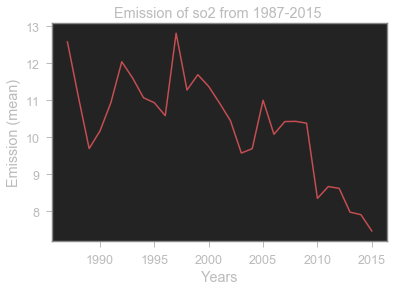

In [23]:
so2_ana = pd.DataFrame(df.groupby('year')['so2','state'].mean())
so2_ana.reset_index(inplace=True)
plt.plot(so2_ana['year'],so2_ana['so2'],'-r')
plt.xlabel("Years")
plt.ylabel("Emission (mean)")
plt.title("Emission of so2 from 1987-2015 ")

Analysing emission of no2 gas

Text(0.5, 1.0, 'Emission of no2 from 1987-2015 ')

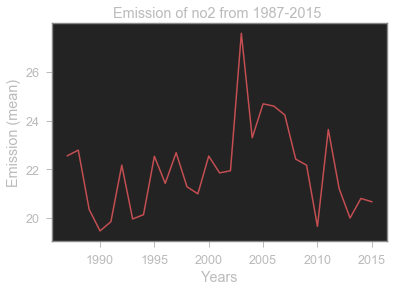

In [24]:
no2_ana = pd.DataFrame(df.groupby('year')['no2','state'].mean())
no2_ana.reset_index(inplace=True)
plt.plot(no2_ana['year'],no2_ana['no2'],'-r')
plt.xlabel("Years")
plt.ylabel("Emission (mean)")
plt.title("Emission of no2 from 1987-2015 ")